In [1]:
data_folder=r'C:\Users\Theodore Tamiolakis\OneDrive\PhD\Lab\data\representational_drift' #r means that I will treat the string as a raw string (/ are special characters)
cnmf_file="{}\\231108_WEZ8917_24hr_poststim_20231115-071711_cnmf.hdf5".format(data_folder) #data from cnmf
belt_file="{}\\231108_WEZ8917_24hr_poststim_20231115-091157.h5".format(data_folder) #data from lab view and lfp

In [2]:
#import necessary packages
import pandas as pd
import h5py
import xarray as xr
import numpy as np
import scipy.sparse 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [3]:
#opening the hpf5 file
fluo_hdf=h5py.File(cnmf_file)['estimates']['C']
#convert it in a dataframe
fluo_hdf=pd.DataFrame(fluo_hdf)

In [4]:
#opening stripe folder

stripe_hdf=h5py.File(belt_file)['inferred']['belt_dict']['stripes']
stripe_hdf=pd.DataFrame(stripe_hdf)

In [5]:
#z scoring the fluorescent trace

fluo_test=fluo_hdf.apply(zscore,axis=1)


making the typical place code test for 1000 frames

C:\Users\Theodore Tamiolakis\AppData\Local\Temp\ipykernel_12832\1632983395.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_filtered = test[test_max >= 0]


<Axes: >

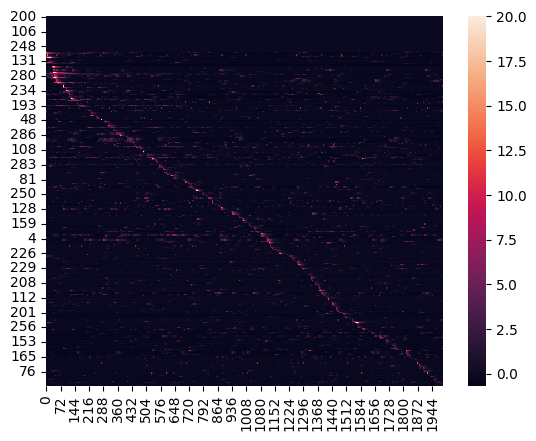

In [6]:
test=fluo_test.iloc[:300,:2000]
test_max=test.apply(np.argmax)
test_filtered = test[test_max >= 0]
filtered_values=test_filtered.apply(np.argmax, axis=1).sort_values().index
test_filtered_sorted = test_filtered.loc[list(filtered_values),:]
# Calculate the maximum diagonal values
sns.heatmap(test_filtered_sorted,vmax=20)

Now I need to plot for one round. to do that I will have fluorescent traces as well as distance, stripes and rounds in one panda frame. so first I will need to transpose the initial panda frame.

In [7]:
fluo_hdf_r=fluo_hdf.T #swap columns and rows in fluo hdf
n_cells=fluo_hdf_r.shape[1]

then I will need to test that I can plot the same plot as before following the exact same logic

In [8]:
fluo_hdf_r=fluo_hdf_r.apply(zscore,axis=0)

creating panda frames for running distance, speed, time and immobility

In [9]:
# panda frame for time
time_hdf=h5py.File(belt_file)['inferred']['belt_dict']['tsscn']
time_hdf=pd.DataFrame(time_hdf)
time_hdf.columns=['Time (ms)']
#panda frame for distance
distance_hdf=h5py.File(belt_file)['inferred']['belt_scn_df']['totdist_abs']
distance_hdf=pd.DataFrame(distance_hdf)
distance_hdf.columns=['Distance (cm)']
# panda frame for speed
speed_hdf=h5py.File(belt_file)['inferred']['belt_scn_df']['speed']
speed_hdf=pd.DataFrame(speed_hdf)
speed_hdf.columns=['Speed (cm/s)']
# panda frame for number of rounds
rounds_hdf=h5py.File(belt_file)['inferred']['belt_scn_df']['rounds']
rounds_hdf=pd.DataFrame(rounds_hdf)
rounds_hdf.columns=['Rounds']
# panda frame for running(yes or no running)
running_hdf=h5py.File(belt_file)['inferred']['belt_scn_df']['running']
running_hdf=pd.DataFrame(running_hdf)
running_hdf.columns=['Running']


adding all of the panda frames to one panda frame to analyse everything at the same time

In [36]:
#adding all the parameters in one panda frame
fluo_hdf_r = pd.concat([fluo_hdf_r, time_hdf, distance_hdf, speed_hdf, rounds_hdf, running_hdf], axis=1, ignore_index=True)
# Create a mapping dictionary for column renaming
rename_mapping = {old_col: new_col for old_col, new_col in zip(fluo_hdf_r.columns[-5:], ['Time (ms)', 'Distance (cm)', 'Speed (cm/s)', 'Rounds', 'Running'])}
# Rename the columns
fluo_hdf_r = fluo_hdf_r.rename(columns=rename_mapping)

now we have everything in one panda frame
I will start by plotting the first round only when the mouse is moving

In [37]:
fluo_hdf_r[(fluo_hdf_r['Running']==1.0) & (fluo_hdf_r['Rounds']==1.0)]

,0,1,2,3,4,5,6,7,8,9,...,593,594,595,596,597,Time (ms),Distance (cm),Speed (cm/s),Rounds,Running
3569,-0.529588,-0.333513,-0.151372,-0.071839,-0.329482,-0.306199,-0.12367,-0.343999,0.103271,-0.248616,...,234219.59060,2882.940610,0.297022,1.0,1.0,234219.59060,2882.940610,0.297022,1.0,1.0
3570,-0.529588,-0.333524,-0.151372,-0.071839,-0.329482,-0.306199,-0.12367,-0.343999,0.034448,-0.248616,...,234285.21715,2912.999640,0.458032,1.0,1.0,234285.21715,2912.999640,0.458032,1.0,1.0
3571,-0.529588,-0.333534,-0.151372,-0.071839,-0.329482,-0.306199,-0.12367,-0.343999,-0.020702,-0.248616,...,234350.84370,2931.062294,0.275234,1.0,1.0,234350.84370,2931.062294,0.275234,1.0,1.0
3572,-0.529588,-0.333544,-0.151372,-0.071839,-0.329482,-0.306199,-0.12367,-0.343999,-0.064895,-0.248616,...,234416.47025,2948.900002,0.271806,1.0,1.0,234416.47025,2948.900002,0.271806,1.0,1.0
3573,-0.529588,-0.333552,-0.151372,-0.071839,-0.329482,-0.306199,-0.12367,-0.344000,-0.100308,-0.248616,...,234482.09685,2960.822984,0.181679,1.0,1.0,234482.09685,2960.822984,0.181679,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7555,-0.529307,-0.333628,-0.151372,-0.071839,-0.200069,0.015190,-0.12367,-0.343996,-0.243134,-0.248616,...,495808.32810,7073.300565,0.159466,1.0,1.0,495808.32810,7073.300565,0.159466,1.0,1.0
7556,-0.529335,-0.333628,-0.151372,-0.071839,-0.210479,-0.014506,-0.12367,-0.343996,-0.243136,-0.248616,...,495873.95525,7092.474324,0.292162,1.0,1.0,495873.95525,7092.474324,0.292162,1.0,1.0
7557,-0.529360,-0.333628,-0.151372,-0.071839,-0.220051,-0.041459,-0.12367,-0.343997,-0.243137,-0.248616,...,495939.58245,7116.231908,0.362008,1.0,1.0,495939.58245,7116.231908,0.362008,1.0,1.0
7558,-0.529382,-0.333628,-0.151372,-0.071839,-0.228854,-0.065921,-0.12367,-0.343997,-0.243139,-0.248616,...,496005.20965,7166.510811,0.766129,1.0,1.0,496005.20965,7166.510811,0.766129,1.0,1.0


now I will transpose it again and print it like before

In [38]:
fluo_hdf_r[(fluo_hdf_r['Running']==1.0) & (fluo_hdf_r['Rounds']==1.0)].iloc[:,:-4]

,0,1,2,3,4,5,6,7,8,9,...,589,590,591,592,593,594,595,596,597,Time (ms)
3569,-0.529588,-0.333513,-0.151372,-0.071839,-0.329482,-0.306199,-0.12367,-0.343999,0.103271,-0.248616,...,0.228730,-0.425072,-0.647262,-0.319469,234219.59060,2882.940610,0.297022,1.0,1.0,234219.59060
3570,-0.529588,-0.333524,-0.151372,-0.071839,-0.329482,-0.306199,-0.12367,-0.343999,0.034448,-0.248616,...,2.513197,-0.454598,-0.651958,-0.319469,234285.21715,2912.999640,0.458032,1.0,1.0,234285.21715
3571,-0.529588,-0.333534,-0.151372,-0.071839,-0.329482,-0.306199,-0.12367,-0.343999,-0.020702,-0.248616,...,2.626781,-0.481082,-0.656189,-0.319469,234350.84370,2931.062294,0.275234,1.0,1.0,234350.84370
3572,-0.529588,-0.333544,-0.151372,-0.071839,-0.329482,-0.306199,-0.12367,-0.343999,-0.064895,-0.248616,...,2.537489,-0.504838,-0.660001,-0.319469,234416.47025,2948.900002,0.271806,1.0,1.0,234416.47025
3573,-0.529588,-0.333552,-0.151372,-0.071839,-0.329482,-0.306199,-0.12367,-0.344000,-0.100308,-0.248616,...,2.371564,-0.526148,-0.663435,-0.319469,234482.09685,2960.822984,0.181679,1.0,1.0,234482.09685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7555,-0.529307,-0.333628,-0.151372,-0.071839,-0.200069,0.015190,-0.12367,-0.343996,-0.243134,-0.248616,...,-0.534043,-0.711719,0.610957,-0.056771,495808.32810,7073.300565,0.159466,1.0,1.0,495808.32810
7556,-0.529335,-0.333628,-0.151372,-0.071839,-0.210479,-0.014506,-0.12367,-0.343996,-0.243136,-0.248616,...,-0.535152,-0.711719,0.481929,-0.075746,495873.95525,7092.474324,0.292162,1.0,1.0,495873.95525
7557,-0.529360,-0.333628,-0.151372,-0.071839,-0.220051,-0.041459,-0.12367,-0.343997,-0.243137,-0.248616,...,-0.536197,-0.711719,0.365518,-0.093360,495939.58245,7116.231908,0.362008,1.0,1.0,495939.58245
7558,-0.529382,-0.333628,-0.151372,-0.071839,-0.228854,-0.065921,-0.12367,-0.343997,-0.243139,-0.248616,...,-0.537183,-0.711719,0.260566,-0.109707,496005.20965,7166.510811,0.766129,1.0,1.0,496005.20965


In [39]:
round1=fluo_hdf_r[(fluo_hdf_r['Running']==1.0) & (fluo_hdf_r['Rounds']==1.0)].iloc[:,:-5].T

c:\Users\Theodore Tamiolakis\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: The behavior of Series.argmax/argmin with skipna=False and NAs, or with all-NAs is deprecated. In a future version this will raise ValueError.
  return bound(*args, **kwds)


Text(50.722222222222214, 0.5, 'Cell ID')

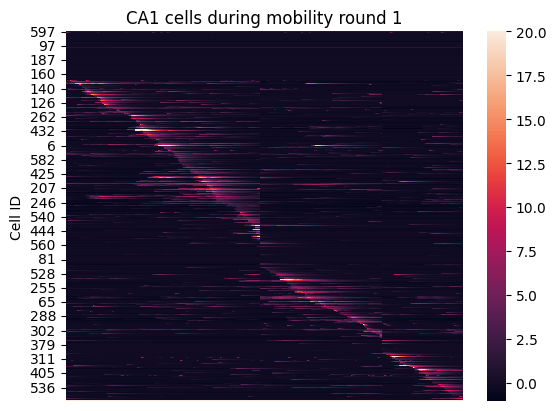

In [41]:
round1_max=round1.apply(np.argmax,axis=1)
test_filtered = round1.loc[round1_max >= 0]
filtered_values=test_filtered.apply(np.argmax, axis=1).sort_values().index
test_filtered_sorted = test_filtered.loc[list(filtered_values),:]
# Calculate the maximum diagonal values
sns.heatmap(test_filtered_sorted,vmax=20,xticklabels=[])

plt.title("CA1 cells during mobility round 1")
plt.ylabel('Cell ID')
